In [54]:
import numpy as np

coord_1 = np.random.exponential(1, size=(50, 1))
coord_2 = np.random.exponential(1, size=(50, 1))
coord_3 = np.random.normal(1, size=(50, 1))

In [55]:
vectors = np.column_stack([coord_1,coord_2,coord_3])

In [56]:
vectors

array([[ 7.97940217e+00,  1.03327662e+00, -4.20950601e-01],
       [ 8.50740823e-01,  6.74331772e-01,  8.45014119e-01],
       [ 1.02938129e+00,  2.45974287e+00,  2.68810280e+00],
       [ 4.48282408e-01,  1.30952075e+00, -1.03302379e-02],
       [ 6.05194790e-01,  9.87372932e-01,  5.95294882e-01],
       [ 2.62458865e-02,  1.83028391e-01,  2.86210477e+00],
       [ 9.47521373e-03,  1.53350881e+00,  2.73844893e+00],
       [ 3.49600983e-01,  1.56507160e-01, -1.10360920e+00],
       [ 1.84267290e+00,  7.29253898e-01,  4.25644690e-01],
       [ 2.12736934e-02,  2.44917250e-01,  2.16094857e+00],
       [ 1.25594036e+00,  6.03835997e-02,  1.73647908e-02],
       [ 1.07145160e+00,  6.58928124e-01, -1.73613721e-01],
       [ 8.36720024e-01,  1.08481552e-01,  1.01006336e+00],
       [ 7.66734703e-01,  8.13176371e-01,  2.27774857e+00],
       [ 8.80415447e-04,  4.46746991e-01,  1.09410829e+00],
       [ 1.46401062e-01,  1.59645034e+00,  8.56752242e-01],
       [ 7.88430156e-01,  3.19803657e-01

In [57]:
from scipy.spatial import ConvexHull

hull = ConvexHull(vectors)

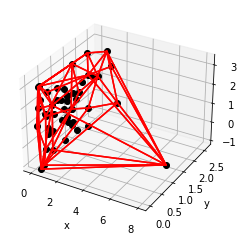

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot(vectors.T[0], vectors.T[1], vectors.T[2], "ko")

for s in hull.simplices:
    s = np.append(s, s[0])  
    ax.plot(vectors[s, 0], vectors[s, 1], vectors[s, 2], "r-")

for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()

In [62]:
from scipy.optimize import golden

def kozinets_algorithm(x, at): # Знаходження розділяючого вектора
    #Шукається такий вектор xj, j E J, який задовольняє умову (at,xj)<=0
    for j in range(0, x.shape[0]):
        scalar_mult = np.dot(x[j],at)
        
        if scalar_mult <= 0:            
            print("Found xj: (at,xj)<=0")
            print(f"j: {j}, \nxj: {x[j]}, \nat: {at}, \nscalar_mult: {scalar_mult}")
            xt = x[j]


            def f(k):
                return np.linalg.norm((1-k)*at+k*xt)

            k = golden(f, full_output=True)[0]#шукаємо к при якому abs((1-k)*at+k*xt) мінімальне
            at1 = (1-k)*at+k*xt
            
            print("at1: ", at1, "\n")
            
            at = kozinets_algorithm(x, at1)#повторюємо процес, поки не знайдемо а такий що min_j∈J (αt, xj) > 

    #Якщо  вектора xj: (at,xj)<=0  не існує, то це означає, що розв'язок задачі є вже знайдено, і at є шуканим вектором.
    return at

In [63]:
print("xj: (at,xj)<=0 was not found \nseparating vector: ", kozinets_algorithm(vectors, vectors[0]))

Found xj: (at,xj)<=0
j: 5, 
xj: [0.02624589 0.18302839 2.86210477], 
at: [ 7.97940217  1.03327662 -0.4209506 ], 
scalar_mult: -0.8062592811006357
at1:  [0.98717863 0.28575885 2.46543264] 

Found xj: (at,xj)<=0
j: 7, 
xj: [ 0.34960098  0.15650716 -1.1036092 ], 
at: [0.98717863 0.28575885 2.46543264], 
scalar_mult: -2.3310322313600333
at1:  [ 0.52863356  0.19280119 -0.10141793] 

Found xj: (at,xj)<=0
j: 5, 
xj: [0.02624589 0.18302839 2.86210477], 
at: [ 0.52863356  0.19280119 -0.10141793], 
scalar_mult: -0.24110619678862555
at1:  [0.49704901 0.19218678 0.08489542] 

xj: (at,xj)<=0 was not found 
separating vector:  [0.49704901 0.19218678 0.08489542]
